In [1]:
import numpy as np
import pandas as pd
import csv
import os

In [2]:
file1 = open("hpssFeatures.csv", 'r')
csvReader1 = csv.reader(file1)
header = next(csvReader1)
fileArray1 = np.array([])
featuresArray1 = []

rowCount = 0
for row in csvReader1:
    fileName = row[0]
    features = row[1].split()

    if features[0] == '[':
        features.pop(0)
    if features[len(features) - 1] == ']':
        features.pop(len(features) - 1)
        
    for i in range(len(features)):
        features[i] = features[i].replace(',', '')

    features[0] = features[0].replace('[', '')
    features[len(features) - 1] = features[len(features) - 1].replace(']', '')
    features = np.array(features)
    features = features.astype(float)
    featuresArray1.append(features)
    fileArray1 = np.append(fileArray1, fileName)
    #fileArray.append(fileName)
    rowCount += 1

In [3]:
featuresNpArray1 = np.zeros((rowCount,7))
for i in range(len(featuresArray1)):
    featuresNpArray1[i, :] = featuresArray1[i]

In [4]:
import matplotlib.pyplot as plt
import matplotlib.style as ms
import sklearn.cluster
import sklearn.preprocessing

In [5]:
scaler1 = sklearn.preprocessing.StandardScaler()
scaler1.fit(featuresNpArray1)
featuresNpArray1 = scaler1.transform(featuresNpArray1)

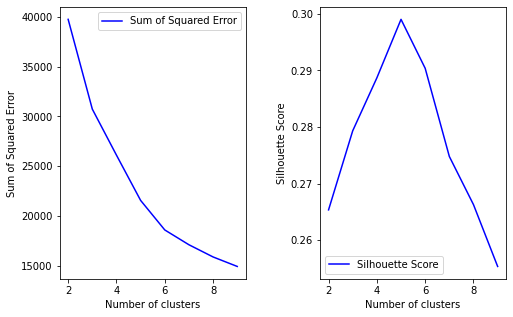

In [6]:
sse = [] #sum of squared errors
sil_coeff = [] #silhouette coefficients

range_n_clusters = range(2, 10)

for k in range_n_clusters:
    kmeans = sklearn.cluster.KMeans(n_clusters=k).fit(featuresNpArray1)
    
    sse.append(kmeans.inertia_)
    
    label = kmeans.labels_
    sil_coeff.append(sklearn.metrics.silhouette_score(featuresNpArray1, label, metric='euclidean'))
         
fig = plt.figure(figsize=(8,5))
fig.add_subplot(121)
plt.subplots_adjust(wspace=0.4)
plt.plot(range_n_clusters, sse,'b-',label='Sum of Squared Error')
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Error")
plt.legend()
fig.add_subplot(122)
plt.plot(range_n_clusters, sil_coeff,'b-',label='Silhouette Score')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

In [7]:
clusters = 6
kmeans1 = sklearn.cluster.KMeans(n_clusters=clusters).fit(featuresNpArray1)

In [8]:
pred_classes1 = kmeans1.predict(featuresNpArray1)
print(len(fileArray1))

for cluster in range(clusters):
    print('cluster: ', cluster)
    
    indiciesWhere = np.where(pred_classes1 == 0)
    for index in indiciesWhere:
        subArray = fileArray1[np.where(pred_classes1 == cluster)]
        print(len(subArray))
        
from sklearn.metrics import pairwise_distances

distances = pairwise_distances(kmeans1.cluster_centers_, featuresNpArray1)
ind = [np.argpartition(i, 6)[:6] for i in distances]
closest = [fileArray1[indexes] for indexes in ind]
print(closest)

7950
cluster:  0
676
cluster:  1
1420
cluster:  2
1541
cluster:  3
1148
cluster:  4
1345
cluster:  5
1820
[array(['148114', '149099', '047897', '113021', '133972', '126224'],
      dtype='<U32'), array(['031391', '000255', '148519', '087100', '029480', '114294'],
      dtype='<U32'), array(['098237', '121738', '058061', '083718', '014569', '063803'],
      dtype='<U32'), array(['126672', '148607', '063043', '142947', '059720', '085426'],
      dtype='<U32'), array(['006380', '071246', '068862', '120300', '113271', '017499'],
      dtype='<U32'), array(['123523', '119939', '107030', '110440', '025216', '110711'],
      dtype='<U32')]


In [9]:
cluster_map = pd.DataFrame()
#cluster_map['data_index'] = featuresNpArray1
cluster_map['cluster'] = kmeans1.labels_
print(cluster_map['cluster'])

index = np.where(fileArray1 == '105141')[0]
print(cluster_map['cluster'][index])

0       2
1       2
2       1
3       2
4       2
       ..
7945    5
7946    2
7947    0
7948    2
7949    5
Name: cluster, Length: 7950, dtype: int32
158    4
Name: cluster, dtype: int32


# 